In [175]:
from src import modules
import MDAnalysis as mda
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [192]:
u = mda.Universe("/data1/jackson/MD/Membrane_Systems/Tubules/DOPC_POPC/r20/production/noW.gro", "/data1/jackson/MD/Membrane_Systems/Tubules/DOPC_POPC/r20/production/noW.xtc")

/home/jcrowley/.conda/envs/prime/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/jcrowley/.conda/envs/prime/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: G
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [178]:
resnames = modules.residue_names(u.select_atoms("not resname W"))

In [179]:
atom_dict = modules.first_and_last_atoms(u, resnames)

In [180]:
sel = u.atoms.select_atoms("not resname W", updating = True)

In [181]:
trajectory_output = []

In [183]:
with tqdm(total=len(u.trajectory[:-1:10])) as pbar:
    for ts in u.trajectory[:-1:10]:
        trajectory_output.append(modules.lipids_per_tubule_leaflet(sel))
        pbar.update(1)

  0%|          | 0/100 [00:00<?, ?it/s]

In [184]:
# formatting for pandas dataframe
headers = []
for resname in resnames: 
    headers.append(resname + " Outer"), headers.append(resname + " Inner")

df = pd.DataFrame(trajectory_output,columns=headers)

In [185]:
df = modules.results_to_df(trajectory_output, resnames)

In [186]:
df

,DOPC Outer,DOPC Inner,POPC Outer,POPC Inner
1,2712,2612,2766,2568
2,2788,2536,2785,2549
3,2798,2526,2806,2528
4,2733,2591,2813,2521
5,2761,2563,2782,2552
...,...,...,...,...
96,2777,2547,2760,2574
97,2772,2552,2771,2563
98,2767,2557,2763,2571
99,2788,2536,2782,2552


  0%|          | 0/11 [00:00<?, ?it/s]

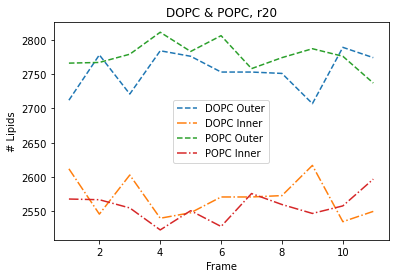

In [204]:
modules.process_trajectory_jupyter(u,title="DOPC & POPC, r20", skip=100)